In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('/content/gurgaon_properties_missing_value_imputation.csv')

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [ ]:
train_df = df.drop(columns=['price_per_sqft','society'])

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


<ipython-input-7-4faa5e8c7c2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

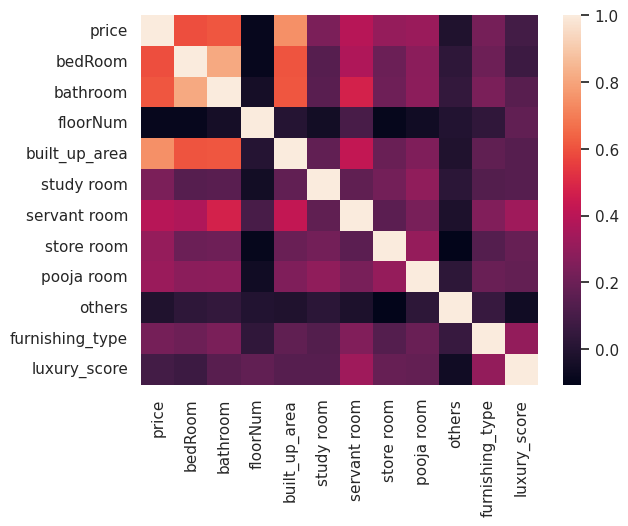

In [ ]:
sns.set()
sns.heatmap(train_df.corr())

In [ ]:
train_df.corr()['price'].sort_values(ascending=False)

<ipython-input-8-8f32b8306ca3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending=False)


price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


**Luxury Score**

<Axes: >

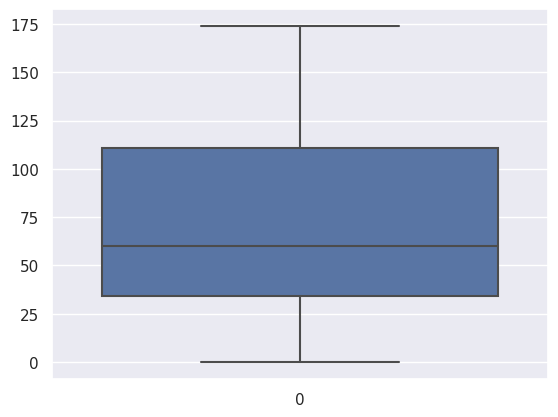

In [ ]:
sns.boxplot(train_df['luxury_score'])

In [ ]:
def categorize_luxury(score):
  if 0 <= score < 50:
    return  "low"
  elif 50 <= score < 150:
    return  "medium"
  elif 150 <= score <= 175:
    return "high"
  else:
    return None  # or "Undefined" or any other label for scores outside the defined bins

In [ ]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,high
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,high


floorNum

<Axes: >

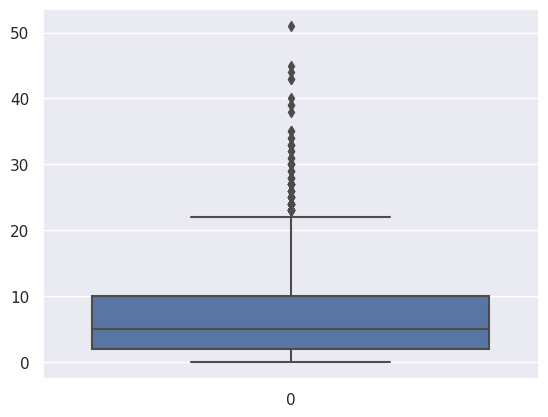

In [ ]:
sns.boxplot(train_df['floorNum'])

In [ ]:
def categorize_floor(floor):
  if 0 <= floor <= 2:
    return "low floor"
  elif 3 <= floor <= 10:
    return "mid floor"
  elif 11 <= floor <= 51 :
    return "high floor"
  else:
    return None

In [ ]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,low,low floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,low,mid floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,low,high floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,high,mid floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,high,mid floor


In [ ]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,low,low floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,low,mid floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,low,high floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,high,mid floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,high,mid floor


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include =['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
  oe = OrdinalEncoder()
  data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
  print(oe.categories_)

# splitting the dataset into training and testing sets
x_label = data_label_encoded.drop('price',axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [ ]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [ ]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

##We use 8 different types of feature selection techniques

Technique 1 - Correlation Analysis

<Axes: >

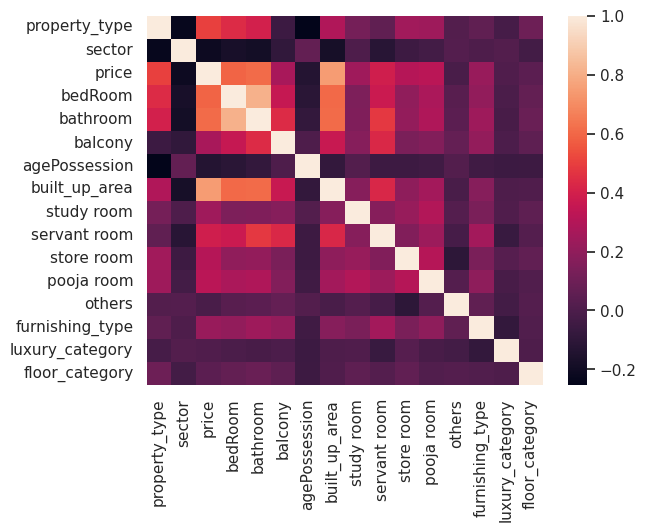

In [ ]:
sns.heatmap(data_label_encoded.corr())

In [ ]:
fi_df1 = data_label_encoded.corr()['price']
fi_df1

property_type      0.503728
sector            -0.212084
price              1.000000
bedRoom            0.591289
bathroom           0.609777
balcony            0.269637
agePossession     -0.136364
built_up_area      0.748574
study room         0.242955
servant room       0.391930
store room         0.305677
pooja room         0.319852
others            -0.013064
furnishing_type    0.225625
luxury_category    0.009788
floor_category     0.042745
Name: price, dtype: float64

In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.136364
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


Technique 2 - Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# train a random forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(x_label,y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature':x_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by='rf_importance',ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650204
1,sector,0.102527
0,property_type,0.100178
3,bathroom,0.026854
2,bedRoom,0.023041
8,servant room,0.019268
5,agePossession,0.014276
4,balcony,0.012876
12,furnishing_type,0.010486
9,store room,0.008424


Technique 3 - Gradient Boosting Feature Importances

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': x_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.677993
1,sector,0.103287
0,property_type,0.098528
2,bedRoom,0.037529
3,bathroom,0.036424
8,servant room,0.023282
9,store room,0.010349
5,agePossession,0.004293
7,study room,0.002786
12,furnishing_type,0.002769


Technique 4 - Permutation importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train_label,x_test_label,y_train_label,y_test_label = train_test_split(x_label,y_label,test_size=0.2,random_state=42)

# train a random forest regressor a label encoded data
rf_label = RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(x_train_label,y_train_label)

# calculate permutation importance
perm_importance = permutation_importance(rf_label,x_test_label,y_test_label,n_repeats=30,random_state=42)

# organize result into a dataframe
fi_df4 =pd.DataFrame ({
    'feature':x_label.columns,
    'permutation_importance':perm_importance.importances_mean
}).sort_values(by='permutation_importance',ascending =False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.735278
0,property_type,0.202905
1,sector,0.181141
3,bathroom,0.022972
8,servant room,0.022321
2,bedRoom,0.019697
5,agePossession,0.006238
9,store room,0.001550
4,balcony,0.001385
11,others,0.000519


Technique 5 - LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# standardize the feature
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

# Train a Lasso Regression model
# we 'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01,random_state=42)
lasso.fit(x_scaled,y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature':x_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by='lasso_coeff',ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510157
0,property_type,0.713542
3,bathroom,0.275145
9,store room,0.199667
7,study room,0.171908
12,furnishing_type,0.164071
8,servant room,0.160535
10,pooja room,0.073860
13,luxury_category,0.055196
2,bedRoom,0.014122


Technique 6 - RFE (Recursive feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label encoded and standardized training data
selector_label = RFE(estimator,n_features_to_select=x_label.shape[1],step=1)
selector_label = selector_label.fit(x_label,y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficient for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# organize the result into a dataframe
fi_df6 = pd.DataFrame({
    'feature':x_label.columns,
    'rfe_score':selected_coefficients
}).sort_values(by='rfe_score',ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.648536
1,sector,0.104666
0,property_type,0.099166
3,bathroom,0.027994
2,bedRoom,0.025717
8,servant room,0.019028
5,agePossession,0.014307
4,balcony,0.012351
12,furnishing_type,0.009539
9,store room,0.008882


Technique 7 - LinearRegression Weights

In [ ]:
from sklearn.linear_model import LinearRegression

# train a linear regression model on the label encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(x_scaled,y_label)

# Extract coefficient
fi_df7 = pd.DataFrame({
    'feature':x_label.columns,
    'reg_coeffs':lin_reg.coef_
}).sort_values(by='reg_coeffs',ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.512527
0,property_type,0.711055
3,bathroom,0.282623
9,store room,0.204243
7,study room,0.180437
12,furnishing_type,0.172927
8,servant room,0.169186
10,pooja room,0.076988
13,luxury_category,0.066012
2,bedRoom,0.016510


Technique 8 - SHAP

In [ ]:

!pip install shap

In [ ]:
from sklearn.ensemble import RandomForestRegressor

import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


array([[-0.18346783,  0.15101807, -0.03175625, ..., -0.01197146,
        -0.00394779, -0.00734004],
       [-0.19871128, -0.39625557, -0.04435721, ..., -0.01027743,
        -0.00306751, -0.002727  ],
       [-0.17708108, -0.41221114, -0.04199956, ..., -0.01325711,
        -0.01258705, -0.01797457],
       ...,
       [-0.19047283,  0.07175678, -0.00415868, ...,  0.00547261,
         0.0151706 , -0.00455335],
       [ 1.50931182,  0.99127024,  0.36875526, ...,  0.12058688,
         0.01995116,  0.04346019],
       [-0.30925661,  0.0230822 , -0.02345662, ...,  0.00509342,
        -0.00730775,  0.03179291]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': x_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.254444
0,property_type,0.471697
1,sector,0.383815
3,bathroom,0.112784
8,servant room,0.095968
2,bedRoom,0.049863
4,balcony,0.040993
5,agePossession,0.028290
12,furnishing_type,0.027127
14,floor_category,0.024473


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [ ]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.212084,0.102527,0.103287,0.181141,-0.069634,0.104666,-0.078648,0.383815
bedRoom,0.591289,0.023041,0.037529,0.019697,0.014122,0.025717,0.016510,0.049863
bathroom,0.609777,0.026854,0.036424,0.022972,0.275145,0.027994,0.282623,0.112784
balcony,0.269637,0.012876,0.001790,0.001385,-0.043575,0.012351,-0.066446,0.040993
agePossession,-0.136364,0.014276,0.004293,0.006238,-0.001058,0.014307,-0.008682,0.028290
built_up_area,0.748574,0.650204,0.677993,0.735278,1.510157,0.648536,1.512527,1.254444
study room,0.242955,0.008295,0.002786,-0.016946,0.171908,0.008202,0.180437,0.019298
servant room,0.391930,0.019268,0.023282,0.022321,0.160535,0.019028,0.169186,0.095968
store room,0.305677,0.008424,0.010349,0.001550,0.199667,0.008882,0.204243,0.017400


In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.711311
sector             0.143205
bathroom           0.035821
bedRoom            0.028010
servant room       0.027484
agePossession      0.011302
balcony            0.010213
store room         0.008127
furnishing_type    0.005823
floor_category     0.005275
luxury_category    0.004752
pooja room         0.003877
study room         0.002621
others             0.002178
dtype: float64

In [ ]:
# to drop pooja room, study room, others
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.8217213750616714

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')


In [ ]:
scores.mean()

0.8182652926493719

In [ ]:
export_df = x_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [ ]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,0.0,0.0,1.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50
